In [1]:
import sys
sys.path.append('../src')

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## 1. Load and Augmenting Dataset

In [2]:
DATASET_PATH = "../dataset"
OUTPUT_PATH = "../data/processed"
from data_preprocessing import load_dataset, generate_unknown_class, augment_dataset
try:
    # Test loading dataset
    images, labels, class_names = load_dataset(DATASET_PATH)
    
    # # Generate unknown class (out-of-distribution)
    # images, labels = generate_unknown_class(images, labels, unknown_ratio=0.15)
    
    # Test augmentation (with smaller factor for testing)
    augmented_images, augmented_labels = augment_dataset(images, labels, augmentation_factor=0.3)
    
    # Display results
    print("\n" + "="*60)
    print("FINAL RESULTS:")
    print("="*60)
    
    print(f"\nOriginal dataset:")
    print(f"   - Images shape: {images.shape}")
    print(f"   - Labels shape: {labels.shape}")
    
    print(f"\nAugmented dataset:")
    print(f"   - Images shape: {augmented_images.shape}")
    print(f"   - Labels shape: {augmented_labels.shape}")
    print(f"   - Total increase: {len(augmented_images) - len(images)} images")
    
    print("\n" + "="*60)
    print("TEST COMPLETED SUCCESSFULLY!")
    print("="*60)
    
except Exception as e:
    print(f"\nError during testing: {e}")
    import traceback
    traceback.print_exc()

Loading dataset from: f:\COURSES\ML\Project\notebooks\..\dataset
Loading 385 images from 'glass' (ID: 0)


Loading glass: 100%|██████████| 385/385 [00:00<00:00, 1419.41it/s]


Loading 449 images from 'paper' (ID: 1)


Loading paper: 100%|██████████| 449/449 [00:00<00:00, 1296.44it/s]


Loading 247 images from 'cardboard' (ID: 2)


Loading cardboard: 100%|██████████| 247/247 [00:00<00:00, 1335.35it/s]


Loading 363 images from 'plastic' (ID: 3)


Loading plastic: 100%|██████████| 363/363 [00:00<00:00, 1394.86it/s]


Loading 315 images from 'metal' (ID: 4)


Loading metal: 100%|██████████| 315/315 [00:00<00:00, 1390.86it/s]


Loading 106 images from 'trash' (ID: 5)


Loading trash: 100%|██████████| 106/106 [00:00<00:00, 1444.05it/s]
f:\COURSES\ML\Project\venv\Lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
f:\COURSES\ML\Project\notebooks\../src\data_preprocessing.py:61: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(



Dataset loaded successfully!
Total images: 1865
Image shape: (224, 224, 3)
Data Columns Names: N/A

Class distribution:
  0 (glass): 385 images
  1 (paper): 449 images
  2 (cardboard): 247 images
  3 (plastic): 363 images
  4 (metal): 315 images
  5 (trash): 106 images
  6 (unknown): 0 images

STARTING DATA AUGMENTATION

Original dataset size: 1865
Augmentation factor: 0.3 (30.0%)
Augmented samples to generate: 559
Target total size: 2424

Augmenting each class proportionally...
  glass: generating 115 augmented images...


  paper: generating 134 augmented images...


  cardboard: generating 74 augmented images...


  plastic: generating 108 augmented images...


  metal: generating 94 augmented images...


  trash: generating 31 augmented images...



AUGMENTATION COMPLETE
Final dataset size: 2421
Increase: 556 images
Actual increase: 29.8%

Augmented class distribution:
  glass: 385 → 500 (+115)
  paper: 449 → 583 (+134)
  cardboard: 247 → 321 (+74)
  plastic: 363 → 471 (+108)
  metal: 315 → 409 (+94)
  trash: 106 → 137 (+31)

FINAL RESULTS:

Original dataset:
   - Images shape: (1865, 224, 224, 3)
   - Labels shape: (1865,)

Augmented dataset:
   - Images shape: (2421, 224, 224, 3)
   - Labels shape: (2421,)
   - Total increase: 556 images

TEST COMPLETED SUCCESSFULLY!


## 2. Test Feature Extraction Methods

TESTING FEATURE EXTRACTION METHODS

VISUALIZING TEST IMAGE


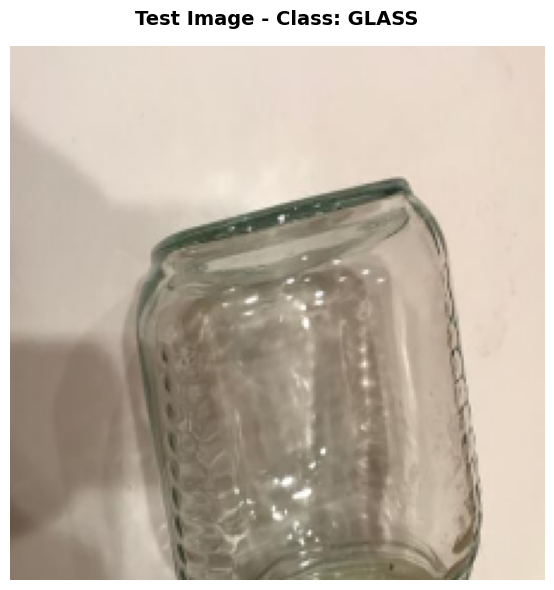


This is the 'glass' image we're extracting features from!
Image shape: (224, 224, 3)

EXTRACTING FEATURES

1. HOG Features:
   - Length: 6084
   - Stats: min=0.0000, max=0.5553, mean=0.1283

2. Color Histogram Features:
   - Length: 54
   - Stats: min=0.0000, max=0.7262, mean=0.1024

3. Combined Features:
   - Total Length: 6138
   - Breakdown: HOG(6084) + Color(54))


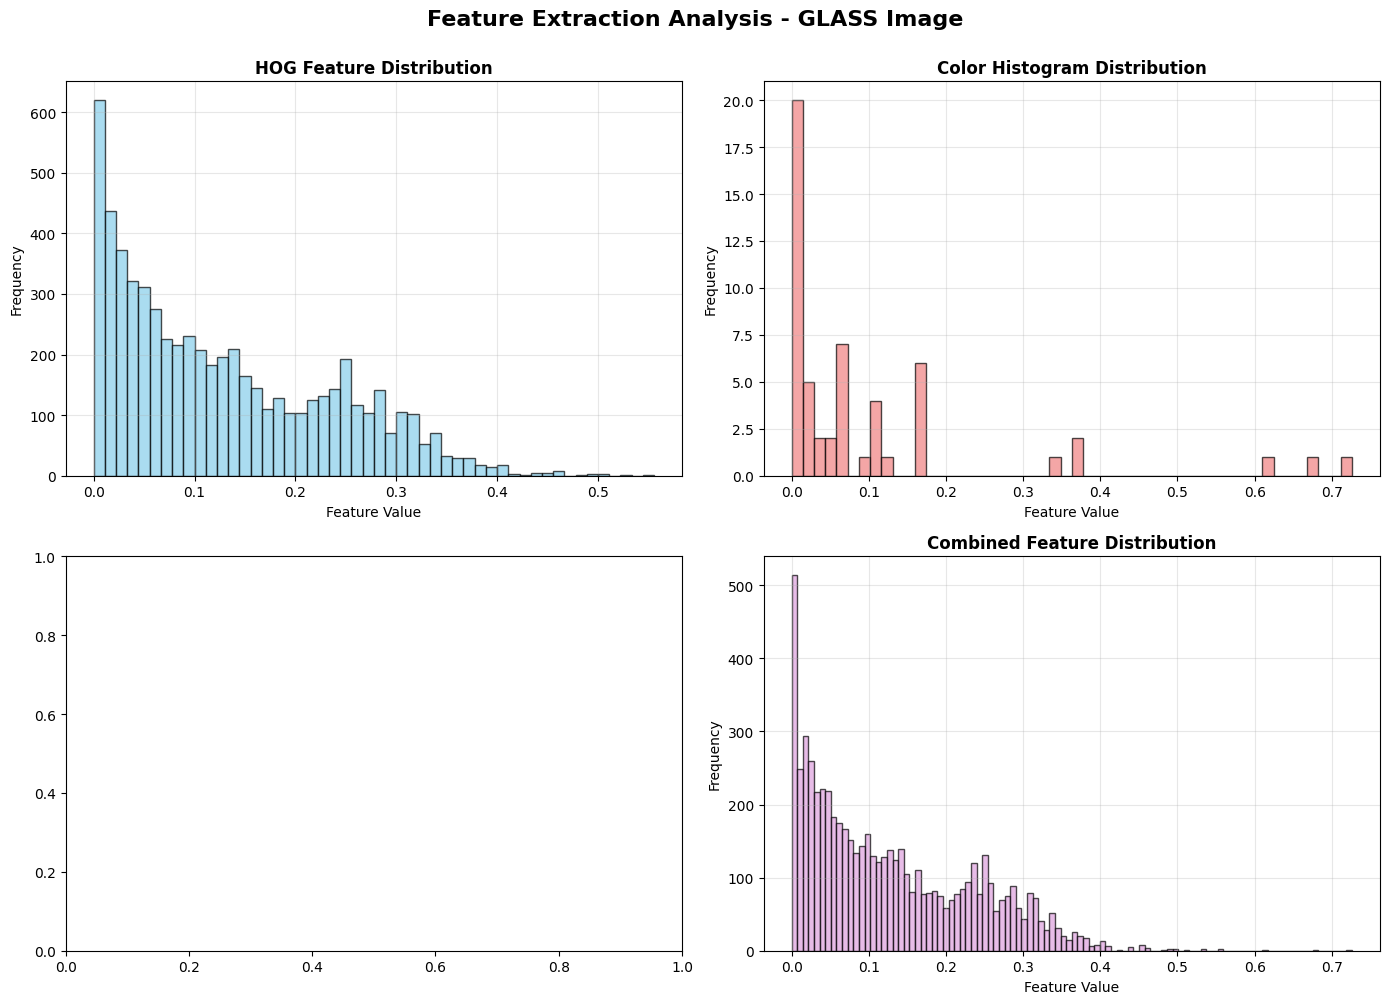

In [3]:
from feature_extraction import (
    extract_hog_features, 
    extract_color_histogram, 
    extract_lbp_features,
    extract_combined_features,
    extract_features_from_dataset
)

print("="*60)
print("TESTING FEATURE EXTRACTION METHODS")
print("="*60)

# Test with a single image first
test_idx = np.random.randint(0, len(augmented_images))
test_image = augmented_images[test_idx]
test_label = augmented_labels[test_idx]

from data_preprocessing import CLASS_NAMES

# DISPLAY THE TEST IMAGE FIRST
print(f"\n{'='*60}")
print("VISUALIZING TEST IMAGE")
print(f"{'='*60}")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Convert BGR to RGB for proper display
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

ax.imshow(test_image_rgb)
ax.set_title(f'Test Image - Class: {CLASS_NAMES[test_label].upper()}', 
             fontweight='bold', fontsize=14, pad=15)
ax.axis('off')

# Add a colored border based on class
border_colors = {
    0: 'lightblue',   # glass
    1: 'wheat',       # paper
    2: 'tan',         # cardboard
    3: 'lightgreen',  # plastic
    4: 'silver',      # metal
    5: 'brown',       # trash
    6: 'gray'         # unknown
}
for spine in ax.spines.values():
    spine.set_edgecolor(border_colors.get(test_label, 'black'))
    spine.set_linewidth(4)

plt.tight_layout()
plt.show()

print(f"\nThis is the '{CLASS_NAMES[test_label]}' image we're extracting features from!")
print(f"Image shape: {test_image.shape}\n")

# Test individual feature extraction methods
print("="*60)
print("EXTRACTING FEATURES")
print("="*60)

print("\n1. HOG Features:")
hog_feat = extract_hog_features(test_image)
print(f"   - Length: {len(hog_feat)}")
print(f"   - Stats: min={hog_feat.min():.4f}, max={hog_feat.max():.4f}, mean={hog_feat.mean():.4f}")

print("\n2. Color Histogram Features:")
color_feat = extract_color_histogram(test_image)
print(f"   - Length: {len(color_feat)}")
print(f"   - Stats: min={color_feat.min():.4f}, max={color_feat.max():.4f}, mean={color_feat.mean():.4f}")

print("\n3. Combined Features:")
combined_feat = extract_combined_features(test_image)
print(f"   - Total Length: {len(combined_feat)}")
print(f"   - Breakdown: HOG({len(hog_feat)}) + Color({len(color_feat)}))")

# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(hog_feat, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('HOG Feature Distribution', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Feature Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(color_feat, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Color Histogram Distribution', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Feature Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

axes[1, 1].hist(combined_feat, bins=100, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Combined Feature Distribution', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Feature Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)

plt.suptitle(f'Feature Extraction Analysis - {CLASS_NAMES[test_label].upper()} Image', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [4]:
# Extract features from entire augmented dataset
print("\n" + "="*60)
print("EXTRACTING FEATURES FROM ENTIRE DATASET")
print("="*60)
print(f"Total images to process: {len(augmented_images)}")

all_features = extract_features_from_dataset(augmented_images, method='combined')

print(f"\nFeature extraction complete!")
print(f"Final feature matrix shape: {all_features.shape}")
print(f"  - Samples: {all_features.shape[0]}")
print(f"  - Features per sample: {all_features.shape[1]}")
print(f"\n✓ Ready for classifier training!")


EXTRACTING FEATURES FROM ENTIRE DATASET
Total images to process: 2421

EXTRACTING FEATURES: COMBINED METHOD
Total images: 2421


Extracting features: 100%|██████████| 2421/2421 [00:15<00:00, 151.72it/s]



Feature extraction complete!
Feature matrix shape: (2421, 6138)
Features per image: 6138


Feature extraction complete!
Final feature matrix shape: (2421, 6138)
  - Samples: 2421
  - Features per sample: 6138

✓ Ready for classifier training!


In [5]:
from sklearn.model_selection import train_test_split
X = all_features
y = augmented_labels
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1936, 6138), (485, 6138), (1936,), (485,))

## KNN Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\n" + "="*60)
print(f"Overall Accuracy: {knn.score(X_test, y_test)*100:.2f}%")
print("="*60)


Overall Accuracy: 39.18%


## SVM Classifier

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("\n" + "="*60)
print(f"Overall Accuracy: {svm.score(X_test, y_test)*100:.2f}%")
print("="*60)


Overall Accuracy: 54.85%
